Topic:        Challenge Set 3

Subject:      Explore and Visualize Movie data

Date:         11/21/2017

Name:         Brendan Fitzpatrick

Worked with:  Zoe Markovits

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

%matplotlib inline

**Pandas Challenges**


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`

**Challenge 1**

Plot domestic total gross over time.

In [3]:
# various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [4]:
df = pd.read_csv("2013_movies.csv")
df['ReleaseDate'] = df['ReleaseDate'].apply(pd.to_datetime)

In [5]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,1.300e+08,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,2.000e+08,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,1.500e+08,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,7.600e+07,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,2.250e+08,291045518,Zack Snyder,PG-13,143,2013-06-14


In [6]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900e+01,1.000e+02,100.000
mean,7.475e+07,1.006e+08,112.260
std,5.942e+07,8.740e+07,18.191
min,2.500e+06,2.557e+07,75.000
25%,2.800e+07,4.270e+07,98.000
50%,5.500e+07,6.954e+07,112.000
75%,1.100e+08,1.205e+08,123.000
max,2.250e+08,4.247e+08,180.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [8]:
df.dropna(axis=0, how="any", inplace=True)

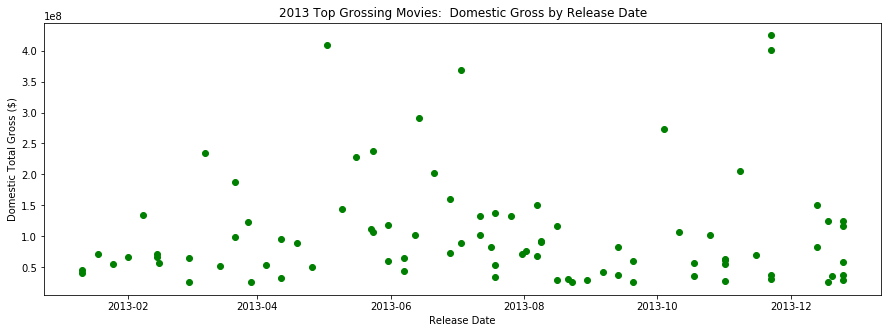

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.plot_date(df.ReleaseDate, df.DomesticTotalGross, marker="o", color="green")
ax.set_title("2013 Top Grossing Movies:  Domestic Gross by Release Date")
ax.set_xlabel("Release Date")
ax.set_ylabel("Domestic Total Gross ($)")
plt.show()

**Challenge 2**

Plot runtime vs. domestic total gross.

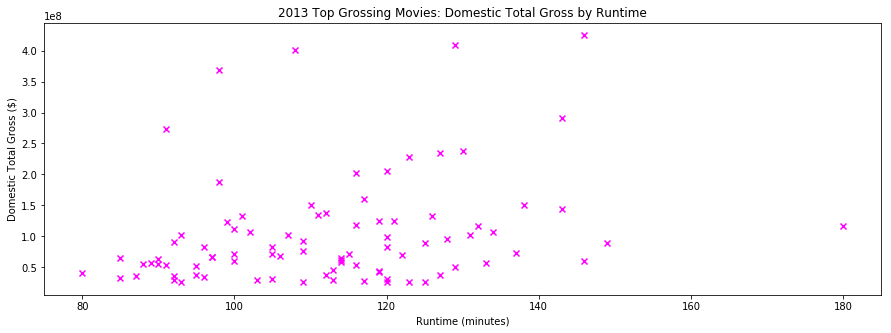

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.scatter(df.Runtime, df.DomesticTotalGross, marker="x", color="magenta")
ax.set(title="2013 Top Grossing Movies: Domestic Total Gross by Runtime",
       xlabel="Runtime (minutes)",
       ylabel="Domestic Total Gross ($)")
plt.show()

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


In [11]:
df_rating = df.groupby("Rating")[["Runtime", "DomesticTotalGross"]].mean()
print(df_rating)

        Runtime  DomesticTotalGross
Rating                             
PG      100.286           1.319e+08
PG-13   117.350           1.177e+08
R       111.939           7.423e+07


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

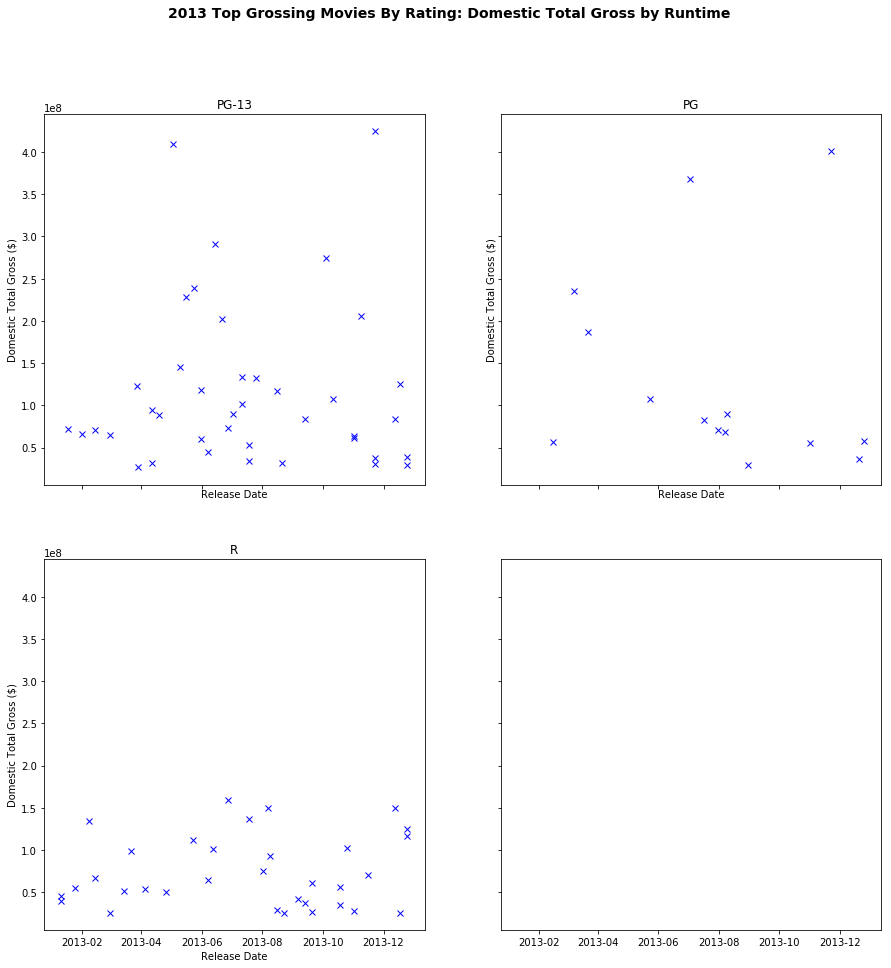

In [12]:
fig = plt.figure(figsize=(15,15))
fig.suptitle("2013 Top Grossing Movies By Rating: Domestic Total Gross by Runtime", fontsize=14, fontweight="bold")
axs = fig.subplots(2, 2, sharex=True, sharey=True)
for counter, rating in enumerate(df.Rating.unique()):
    df_temp = df[df['Rating']==rating]
    ax = axs[(0 if counter < len(df.Rating.unique())/2 else 1), (counter % 2)]
    ax.plot_date(df_temp.ReleaseDate, df_temp.DomesticTotalGross, marker="x",color="blue")
    ax.set(title=rating, xlabel="Release Date", ylabel="Domestic Total Gross ($)")
    
plt.show()

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [13]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [14]:
df_directors = (df.groupby("Director")["DomesticTotalGross"].agg([np.mean, np.count_nonzero])
 .reset_index()
 .sort_values(by="mean", ascending=False))
df_directors.iloc[[0]]

,Director,mean,count_nonzero
26,Francis Lawrence,424668047,1


From the above cell, we can see that **Francis Lawrence** has the hightest gross per movie with an average of **~$425 million per movie**

However, he has only made one movie so it raises the question, who has the highest average that isn't a one hit wonder?

In [15]:
df_directors[df_directors.count_nonzero>1]

,Director,mean,count_nonzero
34,James Wan,110493294,2
56,Malcolm D. Lee,51270491,2


We know find three directors and see that **James Wan** has the highest average of **~110 million**

**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [16]:
import math

In [17]:
def labelMonth(x):
    return monthDict[x.month]

df['Month'] = df.ReleaseDate.apply(lambda x: x.month)

In [18]:
df_months = df.groupby('Month')['DomesticTotalGross'].agg({'count':'count','mean':'mean', \
                                     'sum':'sum', 'std':'std', \
                                     'sem':(lambda x: np.std(x, ddof=1) / math.sqrt(len(x)))})
df_months.reset_index(inplace=True)

/home/bf2931/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


The formula for standard error of the mean is:

*standard deviation of distribution  / $\sqrt{n}$*

Since we normally don't know the actual standard deviation of the distribution, we use instead:

*standard deviation of sample  / $\sqrt{n}$*

In [19]:
monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

def labelMonth(x):
    return monthDict[x]

df_months['MonthLabel'] = df_months.Month.apply(labelMonth)

In [20]:
df_months['mean']

0     5.334e+07
1     7.932e+07
2     1.016e+08
3     6.405e+07
4     1.774e+08
5     1.338e+08
6     1.204e+08
7     7.094e+07
8     5.010e+07
9     1.150e+08
10    1.379e+08
11    7.886e+07
Name: mean, dtype: float64

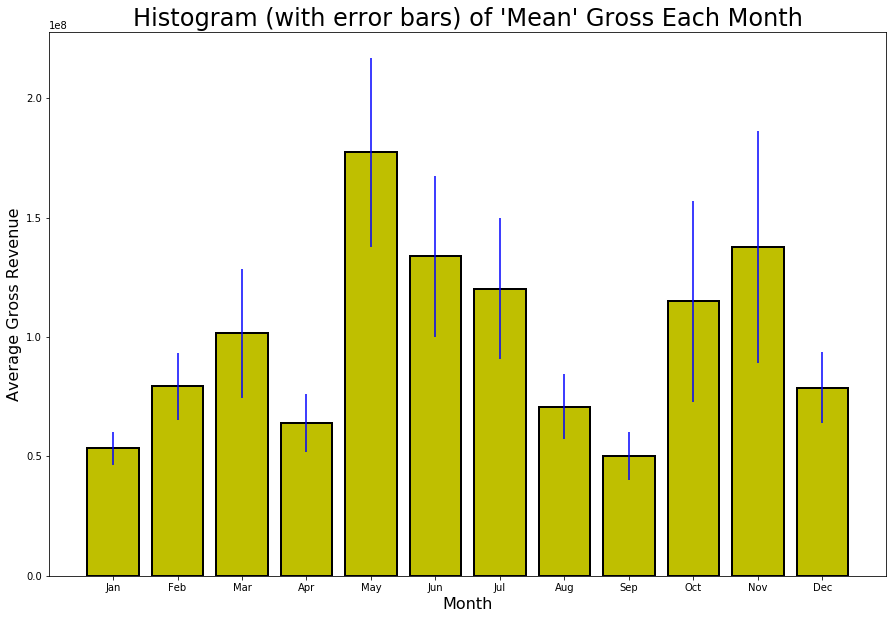

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.bar(df_months['Month'], 
       df_months['mean'], 
       align="center", 
       yerr=df_months['sem'],
       color="y", 
       ecolor="b",
       edgecolor=["black"]*12,
       linewidth=2)
ax.set_xticks(df_months['Month'])
ax.set_xticklabels(df_months['MonthLabel'])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Average Gross Revenue",fontsize=16)
plt.title("Histogram (with error bars) of 'Mean' Gross Each Month",fontsize=24)
plt.show()